In [1]:
import numpy as np
loaded_array = np.load('xtrain_example.npy')
print(loaded_array.shape)

(128, 128, 25)


In [2]:
from keras.models import model_from_json

# Loading the model
json_file = open("model/model.json", "r")
model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(model_json)
# load weights into new model
loaded_model.load_weights("model/model.h5")
print("Loaded model from disk")

Using TensorFlow backend.


Loaded model from disk


In [5]:
import numpy as np
from keras.models import model_from_json
import operator
import cv2

categories = {0: 'HOOK', 1: 'JAP', 2: 'UPPERCUT'} #, 3: 'THREE', 4: 'FOUR', 5: 'FIVE'}


img_array = np.expand_dims(loaded_array, axis=0)
img_array = np.expand_dims(img_array, axis=0)
print(img_array.shape)
# vid = np.array(vid, dtype=np.float32)

result = loaded_model.predict(img_array) # , 128, 128, 25
prediction = {'HOOK': result[0][0], 
              'JAP': result[0][1], 
              'UPPERCUT': result[0][2]}
# Sorting based on top prediction
prediction = sorted(prediction.items(), key=operator.itemgetter(1), reverse=True)

prediction

Loaded model from disk
(1, 1, 128, 128, 25)


[('HOOK', 1.0), ('JAP', 0.0), ('UPPERCUT', 0.0)]

In [2]:
import numpy as np
from keras.models import model_from_json
import operator
import cv2
import sys, os

# Loading the model
json_file = open("model/model.json", "r")
model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(model_json)
# load weights into new model
loaded_model.load_weights("model/model.h5")
print("Loaded model from disk")

cap = cv2.VideoCapture(0)
frameRate = cap.get(5)
categories = {0: 'HOOK', 1: 'JAP', 2: 'UPPERCUT'} #, 3: 'THREE', 4: 'FOUR', 5: 'FIVE'}

vid = []

while True:
    _, frame = cap.read()
    # Simulating mirror image
    frame = cv2.flip(frame, 1)
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    for k in range(int(fps)):
        ret, frame = cap.read()
        frame = cv2.resize(frame,(img_rows,img_cols),interpolation=cv2.INTER_AREA)
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        frames.append(gray)
    
    
    
    vid.append(cv2.resize(img, (128, 128)))
    img_array = np.expand_dims(img_array, axis=0)
        
    vid = np.array(vid, dtype=np.float32)
    
    result = loaded_model.predict(frame.reshape(1, 128, 128, 25)) # , 128, 128, 25
    prediction = {'HOOK': result[0][0], 
                  'JAP': result[0][1], 
                  'UPPERCUT': result[0][2]}
    # Sorting based on top prediction
    prediction = sorted(prediction.items(), key=operator.itemgetter(1), reverse=True)
    
    cv2.rectangle(frame, (0, 0), (300, 40), (0, 0, 0), -1)
    cv2.putText(frame, label, (10, 25), cv2.FONT_HERSHEY_SIMPLEX,0.8, (255, 255, 255), 2)
    # display the frame to our screen
    cv2.imshow("Activity Recognition", frame)
    
    key = cv2.waitKey(1) & 0xFF
    # if the `q` key was pressed, break from the loop
    if key == ord("q"):
        break
        
cap.release()
cv2.destroyAllWindows()

Loaded model from disk


ValueError: cannot reshape array of size 49152 into shape (1,128,128,25)

In [4]:
# import the necessary packages
import numpy as np
import sys
import cv2

# CLASSES = open(args["classes"]).read().strip().split("\n")
SAMPLE_DURATION = 24
SAMPLE_SIZE = 128

# load the human activity recognition model
print("[INFO] loading human activity recognition model...")
tensorflowNet = cv2.dnn.readNetFromTensorflow('model/tf_model.pb', 'model/tensorflowModel.pbtxt')

# grab a pointer to the input video stream
print("[INFO] accessing video stream...")
vs = cv2.VideoCapture(0)

# loop until we explicitly break from it
while True:
    # initialize the batch of frames that will be passed through the
    # model
    frames = []
    # loop over the number of required sample frames
    for i in range(0, SAMPLE_DURATION):
        # read a frame from the video stream
        ret, frame = cv2.read()
        cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        cv2.resize(frame, (128, 128))
        frames.append(frame)
        
    # now that our frames array is filled we can construct our blob
    blob = cv2.dnn.blobFromImages(frames, 1.0,(SAMPLE_SIZE, SAMPLE_SIZE), (114.7748, 107.7354, 99.4750),
        swapRB=True, crop=True)
    blob = np.transpose(blob, (1, 0, 2, 3))
    blob = np.expand_dims(blob, axis=0)
    
    # pass the blob through the network to obtain our human activity
    # recognition predictions
    net.setInput(blob)
    outputs = net.forward()
    label = CLASSES[np.argmax(outputs)]
    
    # loop over our frames
    for frame in frames:
    
        # draw the predicted activity on the frame
        cv2.rectangle(frame, (0, 0), (300, 40), (0, 0, 0), -1)
        cv2.putText(frame, label, (10, 25), cv2.FONT_HERSHEY_SIMPLEX,
            0.8, (255, 255, 255), 2)
        # display the frame to our screen
        cv2.imshow("Activity Recognition", frame)
        key = cv2.waitKey(1) & 0xFF
        # if the `q` key was pressed, break from the loop
        if key == ord("q"):
            break

[INFO] loading human activity recognition model...


error: OpenCV(4.1.2) C:\projects\opencv-python\opencv\modules\dnn\src\tensorflow\tf_io.cpp:54: error: (-2:Unspecified error) FAILED: ReadProtoFromTextFile(param_file, param). Failed to parse GraphDef file: model/tensorflowModel.pbtxt in function 'cv::dnn::ReadTFNetParamsFromTextFileOrDie'


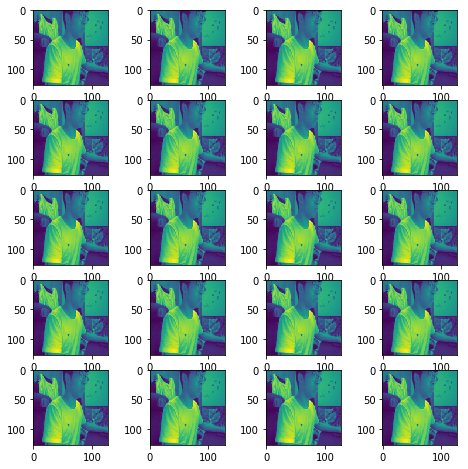

In [42]:
# import matplotlib.pyplot as plt
# for aa in range(25):
#     print(aa)
# cv2.imread(X_test_arr[0][0][:,:,1])
# cv2.imshow(X_test_arr[0][0][:,:,14])
# X_test_arr[0][0][:,:,0].shape


w=10
h=10
fig=plt.figure(figsize=(8, 8))
columns = 4
rows = 5
for i in range(1, columns*rows +1):
#     img = np.random.randint(10, size=(h,w))
    fig.add_subplot(rows, columns, i)
    plt.imshow(X_test_arr[0][0][:,:,i])
plt.show()

In [15]:
from keras.models import model_from_json
from keras.optimizers import SGD

# Loading the model
json_file = open("model/model.json", "r")
model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(model_json)
# load weights into new model
loaded_model.load_weights("model/model.h5")
print("Loaded model from disk")
loaded_model.compile( loss = "categorical_crossentropy", optimizer = SGD(lr=0.001), metrics=['mse', 'accuracy'])

Loaded model from disk


In [14]:
import numpy as np
import operator
import cv2
import time


fps = 25
prev = 0

cap = cv2.VideoCapture(0)

# cap.set(cv2.cv.CV_CAP_PROP_FPS, fps)

categories = {0: 'HOOK', 1: 'JAP', 2: 'UPPERCUT'} #, 3: 'THREE', 4: 'FOUR', 5: 'FIVE'}
SAMPLE_DURATION = 25
SAMPLE_SIZE = 128

while True:
    
    frames = []
    X_test = []
    
    for i in range(0, SAMPLE_DURATION):
        ret, frame = cap.read()
        img = frame.copy()
        img = cv2.resize(img,(128,128),interpolation=cv2.INTER_AREA)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        frames.append(gray)
    
    input = np.array(frames)
    ipt = np.rollaxis(np.rollaxis(input,2,0),2,0)
    X_test.append(ipt)
    X_test_arr = np.array(X_test)
    X_test_arr = np.expand_dims(X_test_arr, axis=0)
    print(X_test_arr.shape)

    result = loaded_model.predict(X_test_arr) # , 128, 128, 25
    print(result[0])
    prediction = {'HOOK': result[0][0], 
                  'JAP': result[0][1], 
                  'UPPERCUT': result[0][2]}
    # Sorting based on top prediction
    prediction = sorted(prediction.items(), key=operator.itemgetter(1), reverse=True)
    print(prediction)

    for frame in frames:
        # draw the predicted activity on the frame
        cv2.rectangle(frame, (0, 0), (300, 40), (0, 0, 0), -1)
        cv2.putText(frame, prediction[0][0], (10, 25), cv2.FONT_HERSHEY_SIMPLEX,0.8, (255, 255, 255), 2)

    # display the frame to our screen
    cv2.imshow("Activity Recognition", frame)

    key = cv2.waitKey(1) & 0xFF
    # if the `q` key was pressed, break from the loop
    if key == ord("q"):
        break
        
cap.release()
cv2.destroyAllWindows()

(1, 1, 128, 128, 25)
[5.4812552e-14 5.1904630e-05 9.9994814e-01]
[('UPPERCUT', 0.99994814), ('JAP', 5.190463e-05), ('HOOK', 5.4812552e-14)]
(1, 1, 128, 128, 25)
[4.9581674e-26 9.5788591e-06 9.9999046e-01]
[('UPPERCUT', 0.99999046), ('JAP', 9.578859e-06), ('HOOK', 4.9581674e-26)]
(1, 1, 128, 128, 25)
[4.327841e-24 7.054393e-03 9.929456e-01]
[('UPPERCUT', 0.9929456), ('JAP', 0.007054393), ('HOOK', 4.327841e-24)]
(1, 1, 128, 128, 25)
[7.4606142e-21 1.4649577e-02 9.8535037e-01]
[('UPPERCUT', 0.9853504), ('JAP', 0.014649577), ('HOOK', 7.460614e-21)]
(1, 1, 128, 128, 25)
[3.2881199e-25 1.1315465e-01 8.8684535e-01]
[('UPPERCUT', 0.88684535), ('JAP', 0.11315465), ('HOOK', 3.28812e-25)]
(1, 1, 128, 128, 25)
[3.865010e-20 2.107977e-09 1.000000e+00]
[('UPPERCUT', 1.0), ('JAP', 2.107977e-09), ('HOOK', 3.86501e-20)]


In [11]:
import numpy as np
import operator
import cv2
import time


fps = 25
prev = 0

cap = cv2.VideoCapture(0)

# cap.set(cv2.cv.CV_CAP_PROP_FPS, fps)

categories = {0: 'HOOK', 1: 'JAP', 2: 'UPPERCUT'} #, 3: 'THREE', 4: 'FOUR', 5: 'FIVE'}
num_frames = 0
frames = []
X_test = []

while True:
    
    ret, frame = cap.read()
    frame = cv2.flip(frame, 1)
    img = frame.copy()
    img = cv2.resize(img,(128,128),interpolation=cv2.INTER_AREA)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
#     print(len(frames))
    frames.append(gray)
    
    if len(frames)==25:
        input = np.array(frames)
        ipt = np.rollaxis(np.rollaxis(input,2,0),2,0)
        X_test.append(ipt)
        X_test_arr = np.array(X_test)
        X_test_arr = np.expand_dims(X_test_arr, axis=0)
        print(X_test_arr.shape)
        
        result = loaded_model.predict(X_test_arr) # , 128, 128, 25
        print(result[0])
        prediction = {'HOOK': result[0][0], 
                      'JAP': result[0][1], 
                      'UPPERCUT': result[0][2]}
        # Sorting based on top prediction
        prediction = sorted(prediction.items(), key=operator.itemgetter(1), reverse=True)
        print(prediction)

        frames = []
        X_test = []
#         print('reset'+str(num_frames))
      

        cv2.rectangle(frame, (0, 0), (300, 40), (0, 0, 0), -1)
        cv2.putText(frame, prediction[0][0], (10, 25), cv2.FONT_HERSHEY_SIMPLEX,0.8, (255, 255, 255), 2)

    num_frames += 1
    # display the frame to our screen
    cv2.imshow("Activity Recognition", frame)


    key = cv2.waitKey(1) & 0xFF
    # if the `q` key was pressed, break from the loop
    if key == ord("q"):
        break
        
cap.release()
cv2.destroyAllWindows()

(1, 1, 128, 128, 25)
[0.00000e+00 8.49208e-29 1.00000e+00]
[('UPPERCUT', 1.0), ('JAP', 8.49208e-29), ('HOOK', 0.0)]
(1, 1, 128, 128, 25)
[0.0000000e+00 1.9231089e-28 1.0000000e+00]
[('UPPERCUT', 1.0), ('JAP', 1.9231089e-28), ('HOOK', 0.0)]
(1, 1, 128, 128, 25)
[0.000000e+00 6.885209e-21 1.000000e+00]
[('UPPERCUT', 1.0), ('JAP', 6.885209e-21), ('HOOK', 0.0)]
(1, 1, 128, 128, 25)
[9.180337e-30 4.452257e-24 1.000000e+00]
[('UPPERCUT', 1.0), ('JAP', 4.452257e-24), ('HOOK', 9.180337e-30)]
(1, 1, 128, 128, 25)
[4.3519026e-27 1.1005113e-24 1.0000000e+00]
[('UPPERCUT', 1.0), ('JAP', 1.1005113e-24), ('HOOK', 4.3519026e-27)]
(1, 1, 128, 128, 25)
[0.0000000e+00 1.1608398e-29 1.0000000e+00]
[('UPPERCUT', 1.0), ('JAP', 1.1608398e-29), ('HOOK', 0.0)]
(1, 1, 128, 128, 25)
[1.4462718e-28 1.7156318e-19 1.0000000e+00]
[('UPPERCUT', 1.0), ('JAP', 1.7156318e-19), ('HOOK', 1.4462718e-28)]


In [5]:
import cv2
import numpy as np
# Testing the videos from Chalearn ConGD dataset on the trained model and printing the result on video using OpenCV3
# Note: We have set random names for five classes and which are printed on the video
# The resulting gesture ID or the label for all 39 gesture classes can be obtained as output
frames = []
cap = cv2.VideoCapture(0)#'datasets\\jap\\22.avi')

fps = 25
for k in range(fps):
    ret, frame = cap.read()
    frame=cv2.resize(frame,(128,128),interpolation=cv2.INTER_AREA)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    frames.append(gray)  
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

input=np.array(frames)
ipt=np.rollaxis(np.rollaxis(input,2,0),2,0)
ipt = np.expand_dims(ipt, axis=0)
ipt = np.expand_dims(ipt, axis=1)

ipt=np.array(ipt)
print(ipt)

prediction=(loaded_model.predict(ipt))
print(prediction)
label = np.argmax(prediction)
print(label)

print('The action is:')
if label==0:
    text = ("Hook")
elif label==1:
    text = ("Jap")
elif label==2:
    text = ("Uppercut")
else:
    text = ("No Action Detected")

# Real-time visualization of the output using OpenCV3
while True:
    ret, frame = cap.read()
    font = cv2.FONT_HERSHEY_SIMPLEX
    frame=cv2.resize(frame,(400,240),interpolation=cv2.INTER_AREA)
    cv2.putText(frame,text,(10,25), font, 1,(255,255,255),2,cv2.LINE_AA)
    cv2.imshow('Frame',frame)
    if cv2.waitKey(25) & 0xFF == ord('q'):
          break
cap.release()
cv2.destroyAllWindows()

[[8.7620484e-29 3.8644245e-18 1.0000000e+00]]
2
The action is:
